In [ ]:
# Objetivo do algoritmo: Determinar se uma múscia, com determinadas caracteríscticas, tem chance
# de bombar em determinado tipo de playlist, por exemplo, Funk, Rock...

# Características do problema
# Neste caso, temos a categoria a qual as músicas pertencem, portando temos uma variável target.
# levando isso em consideração, vamos usar a Aprendizagem Supervisionada, com técnica de classificação.

# Algoritmo de ML utilizado: Random forest
# O Random forest é um tipo de algoritmo Enseble Method, que são um tipo de algoritmo, que não
# utiliza somente um modelo de algoritmo para resolver o problema. Por exemplo, o Random forest,
# vai fazer uso de árvores sequencias e no final, vai verificar em quais dessas árvores ele acertou
# mais e definir uma resposta.

In [72]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, matthews_corrcoef, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
# Lendo a planilha com o pandas
df = pd.read_excel('excel_generos_1_72_.xlsx')

# Filtro de algumas categorias
# 1  - Rock
# 2  - Pop
# 10 - Funk
# 63 - Rave

df = df[(df["category_id"] == 1) | 
        (df["category_id"] == 2) | 
        (df["category_id"] == 10) | 
        (df["category_id"] == 63) #|
        #(df["category_id"] == 5) |
        #(df["category_id"] == 3) |
        #(df["category_id"] == 6) |
        #(df["category_id"] == 25) |
        #(df["category_id"] == 29) |
        #(df["category_id"] == 72)
       ]
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,category_id
0,0.545,0.670,9,-8.810,1,0.0496,0.009000,0.000822,0.0451,0.481,1
1,0.579,0.508,2,-9.484,1,0.0270,0.005740,0.000494,0.0575,0.609,1
2,0.933,0.528,5,-6.472,0,0.1610,0.112000,0.312000,0.1630,0.754,1
3,0.673,0.814,9,-5.411,1,0.0367,0.013300,0.002930,0.3430,0.728,1
4,0.502,0.890,4,-5.175,1,0.0364,0.000147,0.011700,0.2170,0.259,1
...,...,...,...,...,...,...,...,...,...,...,...
24143,0.536,0.669,11,-4.121,0,0.2370,0.317000,0.000000,0.3050,0.891,63
24144,0.772,0.930,1,-1.327,0,0.0648,0.004120,0.000001,0.0863,0.544,63
24145,0.835,0.933,6,-3.301,1,0.0913,0.326000,0.237000,0.0838,0.515,63
24146,0.822,0.731,1,-3.764,1,0.1580,0.311000,0.000008,0.0996,0.645,63


In [74]:
# ----------------- Análise da base -------------------- #

# Agrupando os dados para saber quantos registros temos de cada categoria
df2 = df.groupby(['category_id'])['category_id'].count()
df2

category_id
1     450
2     399
10    392
63    425
Name: category_id, dtype: int64

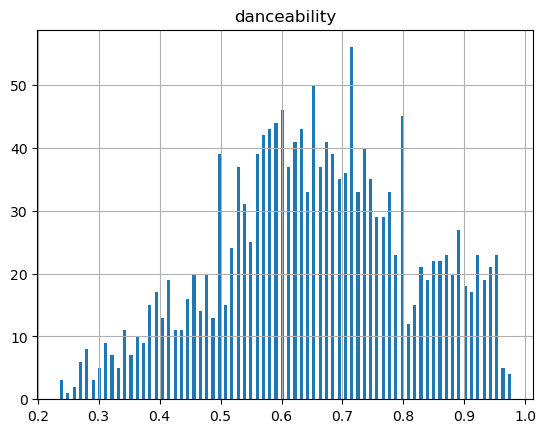

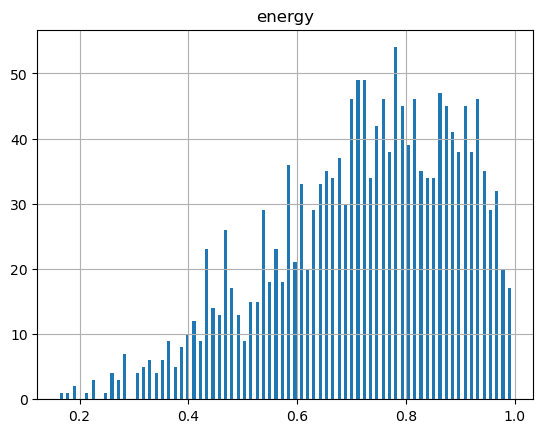

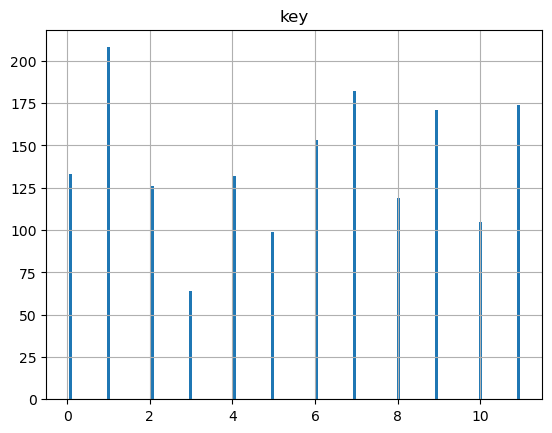

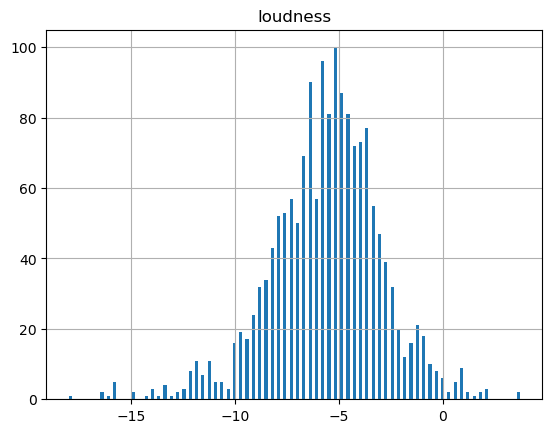

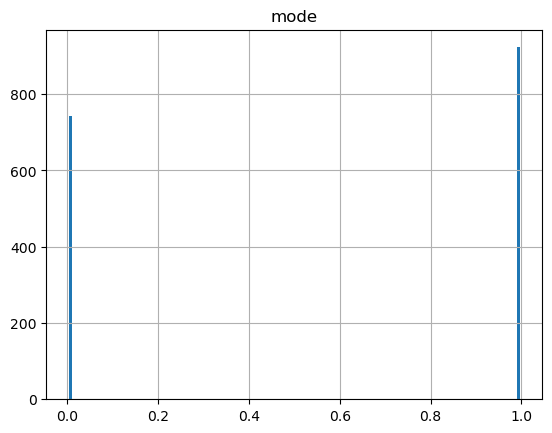

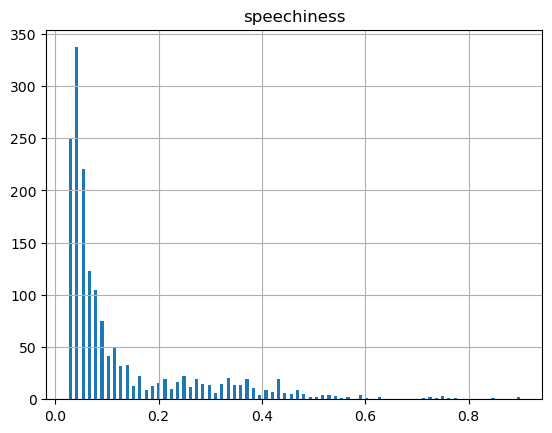

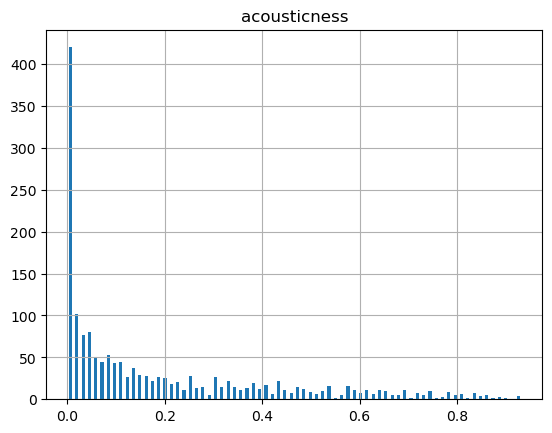

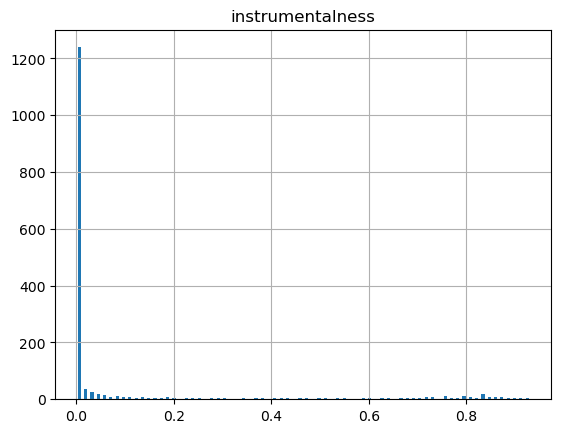

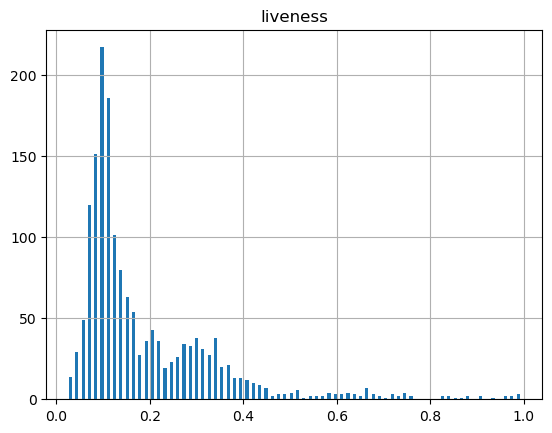

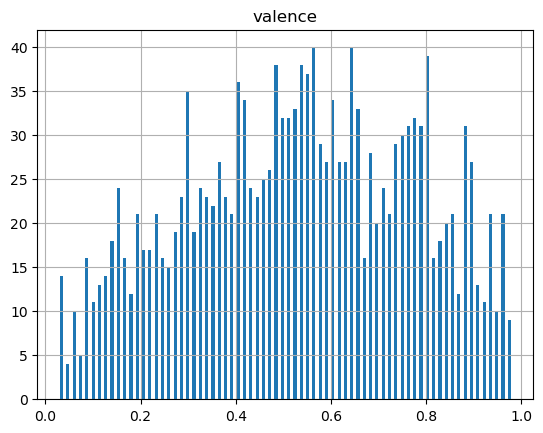

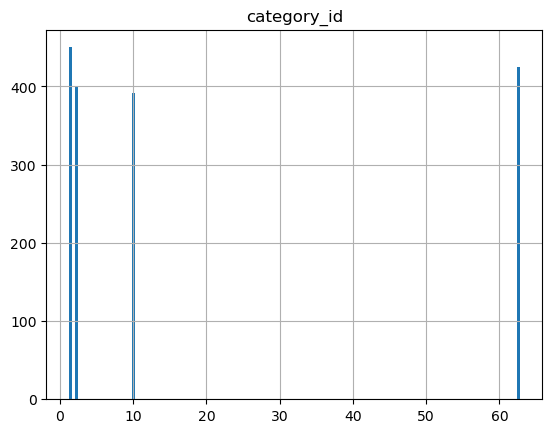

In [75]:
# Para fins de visualização
# Plotagem de todas variáves

df.hist("danceability", bins = 72, rwidth = 0.5)
df.hist("energy", bins = 72, rwidth = 0.5)
df.hist("key", bins = 72, rwidth = 0.5)
df.hist("loudness", bins = 72, rwidth = 0.5)
df.hist("mode", bins = 72, rwidth = 0.5)
df.hist("speechiness", bins = 72, rwidth = 0.5)
df.hist("acousticness", bins = 72, rwidth = 0.5)
df.hist("instrumentalness", bins = 72, rwidth = 0.5)
df.hist("liveness", bins = 72, rwidth = 0.5)
df.hist("valence", bins = 72, rwidth = 0.5)
df.hist("category_id", bins = 72, rwidth = 0.5)
#df.hist(bins=50)
plt.show()

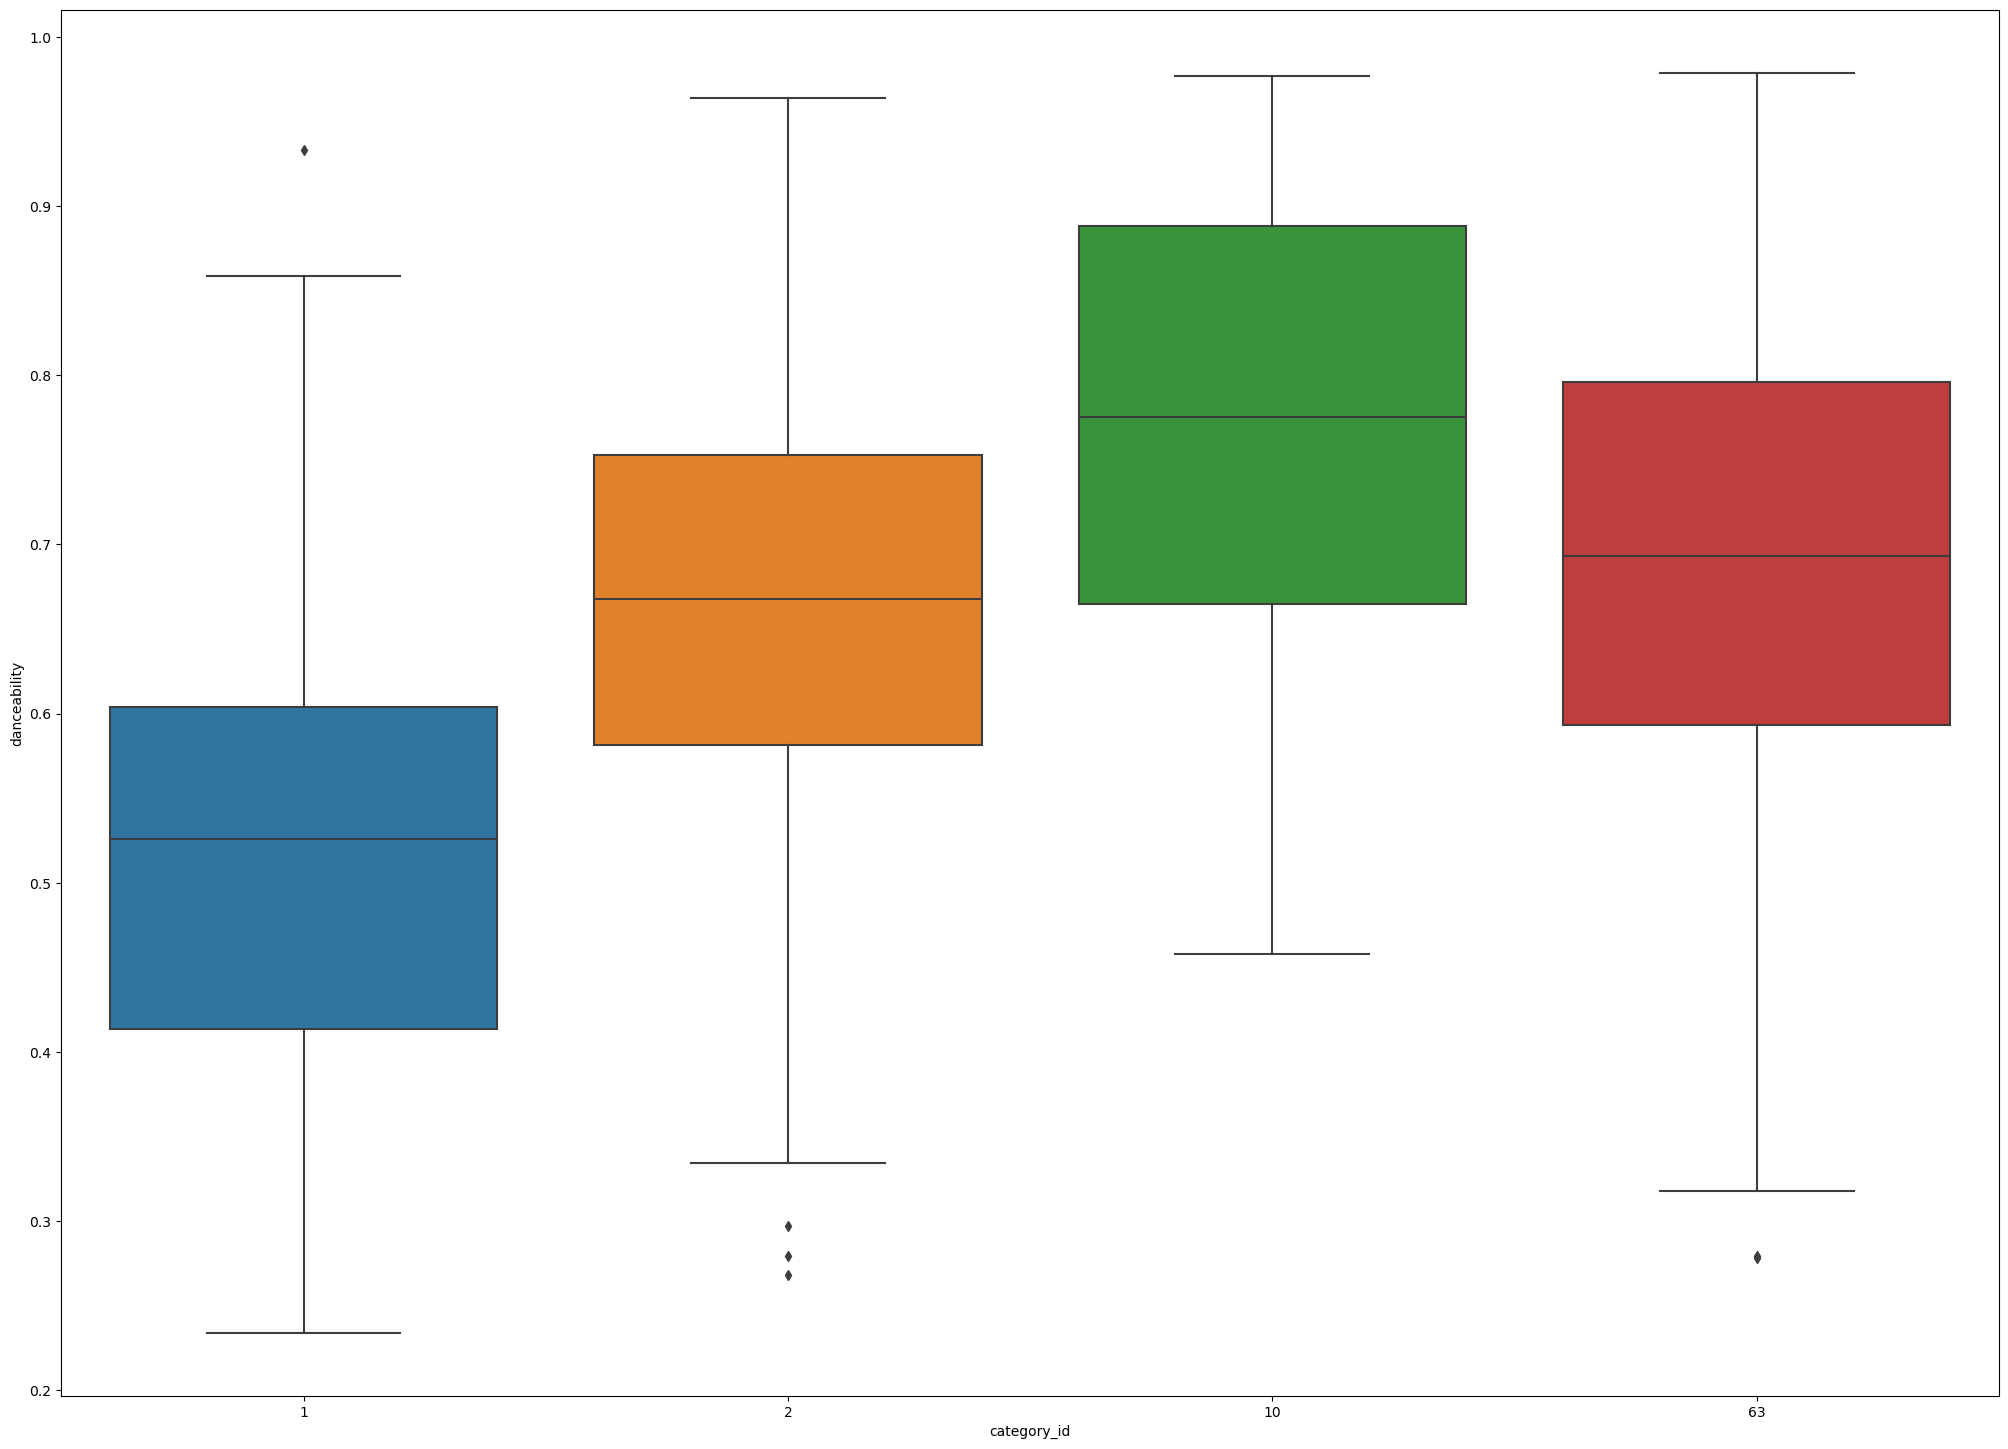

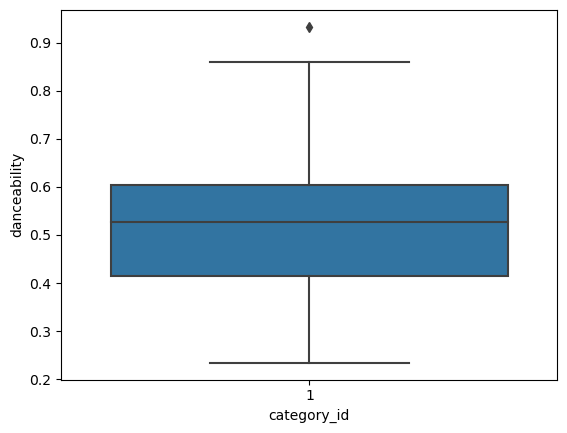

In [76]:
# Agora temos que cruzar a nossa variável target com todas as variáves da nossa base
# Aqui podemos definir se temos outliers

#---------------------------------
# Fiquei com dúvida nessa parte
# Na base teremos 72 categorias diferentes e não um sim ou não conforme a ula da professora Adelaide
# Nesse caso oq deve ser feito? Devo cruzar as 72 categorias com todas as variáves?
# Abaixo podemos ver como o gráfico fica estranho e no final das contas não consigo avaliar nada, caso
# eu use as 72 categorias de uma vez
plt.figure(figsize=(25, 18))
sns.boxplot(data = df, x = "category_id", y = "danceability")
plt.show()
#---------------------------------
# Abaixo estou avaliando somente os casos de categoria 1
df_category_id_1 = df[df["category_id"] == 1]
sns.boxplot(data = df_category_id_1, x = "category_id", y = "danceability")
plt.show()

In [77]:
# Decribe mostra algumas métricas importantes do DataFrame.
# Nesse caso são as métricas relacionadas aos dados das músicas de categoria 1
df_category_id_1.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,category_id
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.0
mean,0.518349,0.768922,5.617778,-6.536404,0.653333,0.059884,0.112658,0.048765,0.223374,0.533355,1.0
std,0.130403,0.167965,3.518408,2.976705,0.476438,0.053638,0.170904,0.152131,0.190886,0.216647,0.0
min,0.234000,0.217000,0.000000,-18.064000,0.000000,0.024900,0.000005,0.000000,0.023600,0.039700,1.0
25%,0.413750,0.678000,2.000000,-8.061500,0.000000,0.033600,0.002002,0.000000,0.101000,0.364000,1.0
50%,0.526000,0.803000,6.000000,-5.846000,1.000000,0.042950,0.024000,0.000091,0.151500,0.527000,1.0
75%,0.604000,0.903500,9.000000,-4.344500,1.000000,0.062700,0.147750,0.003200,0.282000,0.711000,1.0
max,0.933000,0.991000,11.000000,-1.556000,1.000000,0.405000,0.888000,0.896000,0.995000,0.975000,1.0


In [78]:
# ----------------- Fim da análise da base -------------------- #

In [79]:
# Tratamento das variáveis dummies
df = pd.get_dummies(data = df,
                    prefix = ["key","mode"],
                    columns = ["key", "mode"],
                    drop_first = False)
df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,category_id,mode_0,mode_1
0,0.545,0.670,9,-8.810,0.0496,0.009000,0.000822,0.0451,0.481,1,0,1
1,0.579,0.508,2,-9.484,0.0270,0.005740,0.000494,0.0575,0.609,1,0,1
2,0.933,0.528,5,-6.472,0.1610,0.112000,0.312000,0.1630,0.754,1,1,0
3,0.673,0.814,9,-5.411,0.0367,0.013300,0.002930,0.3430,0.728,1,0,1
4,0.502,0.890,4,-5.175,0.0364,0.000147,0.011700,0.2170,0.259,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24143,0.536,0.669,11,-4.121,0.2370,0.317000,0.000000,0.3050,0.891,63,1,0
24144,0.772,0.930,1,-1.327,0.0648,0.004120,0.000001,0.0863,0.544,63,1,0
24145,0.835,0.933,6,-3.301,0.0913,0.326000,0.237000,0.0838,0.515,63,0,1
24146,0.822,0.731,1,-3.764,0.1580,0.311000,0.000008,0.0996,0.645,63,0,1


In [88]:
# Definimos quais vão ser as colunas que vamos avaliar
# Buscamos todas as colunas do dataframe
variables = list(df.columns)
# Eliminamos a coluna de categoia pois será nosso y (variável target)
variables.remove("category_id")

X = df[variables]
y = df["category_id"]

y

0         1
1         1
2         1
3         1
4         1
         ..
24143    63
24144    63
24145    63
24146    63
24147    63
Name: category_id, Length: 1666, dtype: int64

In [89]:
# Normalização dos dados
norm = StandardScaler()
X = norm.fit_transform(X)

X

array([[-0.6866616 , -0.30509978,  0.95527254, ..., -0.2199593 ,
        -0.89720887,  0.89720887],
       [-0.47538455, -1.25452893, -1.00882978, ...,  0.31567695,
        -0.89720887,  0.89720887],
       [ 1.72438238, -1.13731546, -0.16707164, ...,  0.92245239,
         1.11456768, -1.11456768],
       ...,
       [ 1.11540735,  1.23625742,  0.1135144 , ..., -0.07768092,
        -0.89720887,  0.89720887],
       [ 1.03462495,  0.05240132, -1.28941582, ...,  0.46632465,
        -0.89720887,  0.89720887],
       [ 1.19618975,  0.64432937, -1.00882978, ...,  0.84712855,
        -0.89720887,  0.89720887]])

In [90]:
# Criação das variáveis que vamos utilizar para machine learning

# O funcionamento do parâmetro test_size da função train_test_split é o seguinte:
# Quanto maior o valor, mais dados serão usados para os testes (y_test) e menos dados 
# para o treino (y_train)
# No entanto, quanto menor o valor menos dados serão usados para os testes (y_test) e mais dados 
# para o treino (y_train)
# O parâmetro stratify serve para evitar que os dados utilizados para o treinamento e testes, sejam
# tendenciosos. Portanto, ele vai utilizar dados proporcionalmente 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [91]:
y_test
y_test_gorupby = y_test.to_frame()
y_test_gorupby.groupby(['category_id'])['category_id'].count()

category_id
1     90
2     80
10    79
63    85
Name: category_id, dtype: int64

In [92]:
y_train
y_train_gorupby = y_train.to_frame()
y_train_gorupby.groupby(['category_id'])['category_id'].count()

category_id
1     360
2     319
10    313
63    340
Name: category_id, dtype: int64

In [93]:
# Início Random Forest
# Criando o modelo de Random Forest
rf = RandomForestClassifier(n_estimators = 100)

# Treinando o modelo
rf.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = rf.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='micro') * 100
f1 = f1_score( y_test , y_pred, average = 'micro') * 100
confusion = confusion_matrix(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred) * 100
error_rate = 1 - accuracy

print('Acurácia:', accuracy)
print('Precisão:', precision)
print('F1:', f1)
print('Matriz de confusão:')
print(confusion)
print('MCC:', mcc)
print('Taxa de erro:', error_rate)

# Fim Random Forest

Acurácia: 77.54491017964071
Precisão: 77.54491017964071
F1: 77.54491017964071
Matriz de confusão:
[[75 12  1  2]
 [13 55  9  3]
 [ 0  4 67  8]
 [ 2  7 14 62]]
MCC: 70.1585290485272
Taxa de erro: -76.54491017964071


In [107]:
#testes de músicas com features que existem na base

# 16
print(rf.predict([[0.818, 0.913, 4, -3.06, 0, 0.0426, 0.093, 0.0000369, 0.161, 0.536]]))

#23
print(rf.predict([[0.567, 0.371, 7, -10.779, 0, 0.0265, 0.773, 0, 0.114, 0.461]]))

# 28
print(rf.predict([[0.335, 0.0146, 4, -23.818, 0, 0.0441, 0.995, 0.883, 0.0838, 0.0754]]))

# 36
print(rf.predict([[0.765, 0.539, 5, -6.645, 0, 0.0638, 0.466, 0.0124, 0.195, 0.671]]))

#48
print(rf.predict([[0.344, 0.9, 10, -5.997, 1, 0.158, 0.000229, 0.000965, 0.316, 0.251]]))

print(rf.predict([[0.345, 0.9, 11, -5.998, 2, 0.159, 0.000230, 0.000966, 0.317, 0.252]]))

#Teste de múscia que não existe na base

# aleatória criada por mim
print(rf.predict([[0.1800, 0.500, 2, -3.047, 0, 0.0539, 0.730, 0, 0.761, 200]]))

ValueError: X has 10 features, but RandomForestClassifier is expecting 22 features as input.

In [105]:
# Lendo a planilha com dados de quais múscias os users ouviram
df_spotify_dataset_users_tracks = pd.read_csv('excel_features_156fd148c44f2bce755b09bf95985ee8_.csv', on_bad_lines='skip')

In [109]:
for idx, music in df_spotify_dataset_users_tracks.iterrows():
    print(music["id"])
    print(rf.predict([[music["danceability"], 
                       music["energy"], 
                       music["key"], 
                       music["loudness"], 
                       music["mode"],
                       music["speechiness"],
                       music["acousticness"], 
                       music["instrumentalness"], 
                       music["liveness"], 
                       music["valence"]]]))
    print("--------------")

0WZVGXO8FYpK8v1IDxlOyE
[7]
--------------
00cxhG668jV6gU6VK2FUVI
[7]
--------------
4eDYMhIin1pSLIG96f1aD0
[7]
--------------
40qjDdULzkFRlivTqTggLH
[7]
--------------
2SHnUyZq0zwmvRIl4WY77G
[7]
--------------
2sduRP2wX0dG7waoyGPOGf


C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.was

[4]
--------------
1xMLthTaWJieT9YGV1hyS5
[7]
--------------
1gNDbq3ufi6VZJJuQWJiPe
[7]
--------------
1u6LOWtdWA2wwa3CryIBsS
[7]
--------------
2ee46eHIDrDT28dQWAhr21
[7]
--------------
5FU5b1b0hVR016VdeJcYRd
[7]
--------------
0yrKF6Fj0dxkltqmBMvcQU
[7]
--------------
6PtXobrqImYfnpIxNsJApa
[7]
--------------
6VRhkROS2SZHGlp0pxndbJ


C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.was

[4]
--------------
640AR2YmgcKoJpaqTnCE4R


C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[7]
--------------
22DnBQIIXFPJNRGuNjWlSg
[7]
--------------
1SOfxwVz2KBMzatpfTHqIR
[7]
--------------
3BHXrvIfVQwyjwOccHlyN7
[6]
--------------
5PZI5xTcMq8FsCcEroth7S
[7]
--------------
7xQYVjs4wZNdCwO0EeAWMC
[7]
--------------
6fdHO3OJsu1Lwq0XSFmVCk
[7]
--------------
1trC8L8YpawkU553ymy2zC
[6]
--------------
4BSWjP0LLUv6rTBsUgjHUG
[7]
--------------
18zQdV6BhfeoVU4OLnEO7p


C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.was

[7]
--------------
2Tz46GlN7rb3xs2JHKJstD
[7]
--------------
4wtR6HB3XekEengMX17cpc
[7]
--------------
5DKHdWT3u5mOu3dm8A8P1V
[7]
--------------
60wwxj6Dd9NJlirf84wr2c
[6]
--------------
3bxtgzAeAZPdRtKoPL5GG2
[7]
--------------
2ToIksTPpJ4csKPEOdUEyM
[1]
--------------
3Tcs2zdJsXSSFxO6liZbkS
[4]
--------------
5faJXkNwcNiY7qsIliiAfy


C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.was

[7]
--------------
7pqgMEKsDMOHUdFQ7n0N9K
[1]
--------------
6YKnt1usFogwmxS6hYc5Jd
[6]
--------------
1gEfBDVdhmcDtV1LPQazkN
[7]
--------------
2VEZx7NWsZ1D0eJ4uv5Fym
[7]
--------------
5aPjlZVzYFxXzO6VN9XzeL
[7]
--------------
5B89IGusnn7ALpum6QnA02
[2]
--------------
4YLuaFFnWTJHu3tLiTPLRf
[7]
--------------
5gMzdeAupiOHDo4H8GMK4c
[7]
--------------
6UEJtAnGHnK5tVhoPHD6tU


C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.was

[4]
--------------
4ZsPPvNEpvqWinxqlI68m7
[7]
--------------
5jayakmKQm7hDyoBhSoDKx
[7]
--------------
2OnqLGs0xZvr8ZNzWJELGo
[7]
--------------
6vseQZb17iPCXjCIzUkDAL
[7]
--------------
4ZK4vl7z7dr1aTGRTlgvgB
[7]
--------------
5kwAIpUBwhmiBpsJlcMgO1
[7]
--------------
0BomfsUcw03fQPKK668Etn
[6]
--------------


C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.wasem\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rodrigo.was

                                 user_id  "artistname"  \
350375  c6af8cb99f488aa2def073d68c7da58c  Tye Tribbett   
350376  c6af8cb99f488aa2def073d68c7da58c         Elena   

                   "trackname"    "playlistname"  
350375                Champion  Liked from Radio  
350376  Hot Girls - Radio Edit  Liked from Radio  


2
